In [1]:
# Í≤ΩÍ≥†Ï∞Ω Î¨¥Ïãú
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymongo
import pandas as pd

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_APP_GOOGLE = db['TRAVEL_APPLICATION']
collection_APP_APPLE = db['TRAVEL_APPLICATION_APPLE']

data_APP_GOOGLE = collection_APP_GOOGLE.find()
data_APP_APPLE = collection_APP_APPLE.find()

df_APP_GOOGLE = pd.DataFrame(data_APP_GOOGLE)
df_APP_APPLE = pd.DataFrame(data_APP_APPLE)

# 1. APP_GOOGLE & df_APP_APPLE ÌÇ§ÏõåÎìú(Î™ÖÏÇ¨ ÌòïÌÉúÏÜå) Ï∂îÏ∂ú

In [3]:
# app(google, apple) Îç∞Ïù¥ÌÑ∞Î•º concat ÏßÑÌñâ
df_app = pd.concat([df_APP_GOOGLE, df_APP_APPLE], ignore_index=True)

# 2. ÏûêÏó∞Ïñ¥ Ï†ÑÏ≤òÎ¶¨

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶à ÌôïÏù∏
df_app.shape

(17751, 6)

In [5]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
df_app.head()

_id     app_name user_score      user_date  \
0  662f099973f7ce16925e6b4e  tripadvisor          4   2019ÎÖÑ 5Ïõî 13Ïùº   
1  662f099973f7ce16925e6b4f  tripadvisor          2  2019ÎÖÑ 12Ïõî 16Ïùº   
2  662f099a73f7ce16925e6b50  tripadvisor          1   2020ÎÖÑ 3Ïõî 20Ïùº   
3  662f099a73f7ce16925e6b51  tripadvisor          4   2019ÎÖÑ 5Ïõî 13Ïùº   
4  662f099a73f7ce16925e6b52  tripadvisor          5   2019ÎÖÑ 5Ïõî 19Ïùº   

                                       user_comments evaluation  
0  ÎÇØÏÑ† Ïó¨ÌñâÏßÄÏóêÏÑú ÎßûÎì† ÌãÄÎ¶¨Îì† Ïù¥Îü∞ Í∞ÄÏù¥ÎìúÍ∞Ä ÏûàÎã§Îäî Í≤ÉÏùÄ ÎßéÏùÄ ÎèÑÏõÄÏù¥ Îê©ÎãàÎã§. ÎïåÎ°† ...         73  
1  ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÏÑú Íµ¨Í∏ÄÎ°ú Î°úÍ∏¥ÌïòÍ≥† ÏòàÏïΩÌïúÎã§Ïùå Î©îÏùºÏóê Ìã∞Ïºì Îã§Ïö¥Î°úÎìúÌïòÍ∏∞Í∞Ä ÏûàÍ∏∏Îûò Ìè∞ÏóêÏÑú Ïï±...         59  
2  ÏµúÍ∑º ÏóÖÎç∞Ïù¥Ìä∏ÌõÑ Ïã§ÏãúÍ∞Ñ Ìï≠Í≥µÍ∂å Í∞ÄÍ≤©Ïù¥ ÎÇöÏãúÏÑ± Í∞ÄÍ≤©ÏúºÎ°ú ÎÇòÏò§Í≥† Í≤∞Ï†úÎäî Ïã§Ï†úÎ°ú ÎêòÏßÄ Ïïä...         60  
3  Ïó¨ÌñâÏ†Ñ Ìï≠ÏÉÅ Ïó¨ÌñâÏ†ïÎ≥¥Î•º ÏúÑÌï¥ Ïó¥Ïñ¥Î≥¥Îäî Ïï±ÏûÖÎãàÎã§. ÏàôÏÜåÎ∞è ÏãùÎãπÏùÄ Î¨ºÎ°†Ïù¥Í±∞ÎãàÏôÄ Îì§Îü¨Î≥ºÎßå...          8  
4  Îã§ÏñëÌïú ÏΩòÌÖêÏ∏†ÏôÄ Î∑∞, Î¶¨Î∑∞Í∞Ä Ïûò Ïñ¥Ïö∏Ïñ¥ÏßÑ Ïñ¥Ìîå. ÌïòÏßÄÎßå, ÏßÄÍ∑πÌûà Ïó¨ÌñâÏûê Ï§ëÏã¨Ïùò Í≤∞Í≥º...         14

## 2.1 EDA

In [6]:
#1. Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°Ïπò ÌôïÏù∏
df_app.isnull().sum()

_id              0
app_name         0
user_score       0
user_date        0
user_comments    0
evaluation       0
dtype: int64

In [7]:
# ÌÉÄÍπÉÏùò ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏ÌïòÍ∏∞
df_app["user_comments"].value_counts()

user_comments
Ï¢ãÏïÑÏöî                                             776
Íµø                                               471
good                                            161
Good                                            144
Íµ≥                                               127
                                               ... 
Ïó¨ÌñâÏ§ÄÎπÑÏñ¥ÌîåÍ≥ÑÏùò Í∞ë!!! Í∑∏Îü∞Îç∞ Í¥ÄÍ¥ëÏßÄ Ï†ïÎ≥¥Í∞Ä Ï¢ÄÎçî Îã§ÏñëÌïòÍ≤å ÎÇòÏò§Î©¥Ï¢ãÍ≤†ÎÑ§Ïöî~,~      1
Ìï≠ÏÉÅÏÇ¨Ïö©Ìï¥Ïöî Î≥¥Í∏∞ÎèÑ Ìé∏ÌïòÍ≥† Îì§Í≥†Îã§ÎãàÎ©¥ÏÑú Ï∞æÍ∏∞ÎèÑ Ìé∏Ìï¥Ïöî!!                   1
ÏûòÏì∞Í≥†ÏûàÏóàÎäîÎç∞ Ïã§ÌñâÌïòÎ©¥ Í∞ïÏ†úÏ¢ÖÎ£åÎê©ÎãàÎã§ Í∞§Îü≠Ïãús9+ÏÇ¨Ïö©Ï§ëÏûÖÎãàÎã§ ÏóÖÎéÉÎ∂ÄÌÉÅÎìúÎ†§Ïöî         1
Ïó¨Ìñâ Ï†ïÎ¶¨ÌïòÍ≥† Í∏∏Ï∞æÍ≥† ÏòàÏïΩÌïòÍ≥† Î™®Îì†Í≤å ÌïúÎ≤àÏóê Í∞ÄÎä•Ìï¥Ïöî                     1
ÏùºÏ†ïÏßúÎäîÎç∞ ÎèÑÏõÄÏù¥ ÎßéÏù¥ Îê©ÎãàÎã§                                  1
Name: count, Length: 14399, dtype: int64

In [8]:
# 1. ÌïÑÏöîÌïú Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import rc

# matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
mpl.rc('font', family='NanumBarunGothic')
# %matplotlib inline

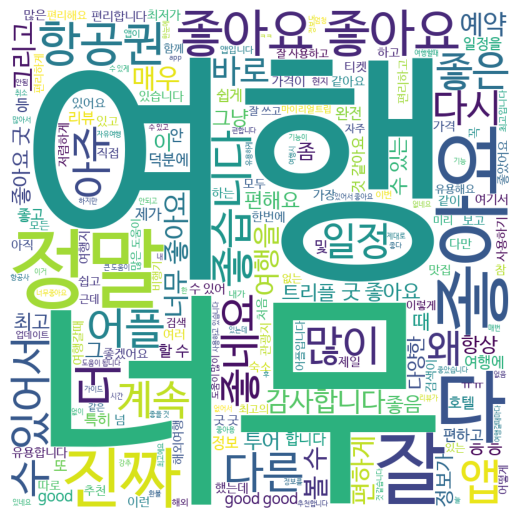

In [9]:
# 2. Stopwords Î∞è ÌäπÏàòÎ¨∏Ïûê ÌïÑÌÑ∞ÎßÅÏùÑ ÏúÑÌïú Ï§ÄÎπÑ

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. Î¨∏Ïû• Îç∞Ïù¥ÌÑ∞Î•º Îã®Ïñ¥ÌôîÌïòÍ∏∞
for val in df_app["user_comments"]:

  # Î¨∏Ïû•ÏùÑ stringÏúºÎ°ú ÎßåÎì§Í∏∞
  val = str(val)

  # Î¨∏Ïû•ÏùÑ Ï™ºÍ∞úÍ∏∞
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

# wordcloud ÏÉùÏÑ± ÏãúÏóê Ìè∞Ìä∏ Í≤ΩÎ°ú ÏßÄÏ†ï
wordcloud = WordCloud(width = 800, height = 800, 
                font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") #x,yÏ∂ï Î≤îÎ°ÄÎ•º ÏóÜÏï†Ï§å
plt.tight_layout(pad = 0)
plt.show() 

In [10]:
# ÌïÑÌÑ∞ÎßÅÌï† Ï∂îÍ∞ÄÏ†ÅÏù∏ stopwordsÎì§ Ï†ïÏùò

stopwords_2 = ["Ïó¨Ìñâ", "ÎÑàÎ¨¥", "Ï†ïÎßê", "ÎßéÏù¥", "Ìï≠Í≥µÍ∂å", "ÏùºÏ†ï", "Ìà¨Ïñ¥", "Í≥ÑÏÜç", "Îß§Ïö∞", "Îã§", "Îçî", "Ìï≠ÏÉÅ", "Ïï±", "Ïàò", "ÏûàÏñ¥ÏÑú"
               , "ÌïúÎ≤àÏóê", "Îã§ÏñëÌïú", "Ïù¥", "Ïôú", "Ïàò", "Ïûò", "ÏßÑÏßú", "ÎèÑÏõÄÏù¥", "Ïñ¥Ìîå", "ÏïÑÏ£º", "Îïå", "ÎßéÏùÄ", "Í≤É", "ÏûàÎäî", "Îã§Î•∏"
               , "ÏûàÏñ¥", "Ïó¨ÌñâÏóê", "Îã§Ïãú", "Ï¢Ä", "Î≥º", "Ï†ïÎ≥¥Î•º", "Ìï†", "Î∞îÎ°ú"]

## 2.2 ÌÜ†ÌÅ∞Ìôî Î∞è Stopwords(Î∂àÏö©Ïñ¥) Ï†úÍ±∞

In [11]:
# ÌÜ†ÌÅ∞ÌôîÎêú Î¨∏Ïû•ÌôïÏù∏
tokenized_text[0]

['ÎÇØÏÑ†',
 'Ïó¨ÌñâÏßÄÏóêÏÑú',
 'ÎßûÎì†',
 'ÌãÄÎ¶¨Îì†',
 'Ïù¥Îü∞',
 'Í∞ÄÏù¥ÎìúÍ∞Ä',
 'ÏûàÎã§Îäî',
 'Í≤ÉÏùÄ',
 'ÎßéÏùÄ',
 'ÎèÑÏõÄÏù¥',
 'Îê©ÎãàÎã§.',
 'ÎïåÎ°†',
 'Í∏∞ÎåÄÌïòÏßÄ',
 'ÏïäÏïòÎçò',
 'Ï†ïÎ≥¥ÎèÑ',
 'ÏñªÏùÑ',
 'Ïàò',
 'ÏûàÏäµÎãàÎã§.',
 'Ï†ïÎ≥¥Ïùò',
 'Ï†ïÌôïÏÑ±ÏùÑ',
 'Í∏∞ÌïòÍ∏∞',
 'ÏúÑÌï¥',
 'Ïó¨Í∏∞ÏóêÏÑú',
 'Ï∂îÏ≤úÌïú',
 'Í≥µÏùÑ',
 'Îã§Î•∏',
 'Î∞©Î≤ïÏúºÎ°ú',
 'Í≤ÄÏÉâÌï¥Î≥¥Î©¥',
 'Ïñ¥Îäê',
 'Ï†ïÎèÑ',
 'Ïú†Ï∂îÍ∞Ä',
 'Í∞ÄÎä•Ìï¥ÏßëÎãàÎã§.',
 'Ïó¨Ìñâ',
 'ÎïåÎßàÎã§',
 'ÏöîÍ∏¥ÌïòÍ≤å',
 'ÌôúÏö©Ìï©ÎãàÎã§.']

In [12]:
len(tokenized_text)

17751

In [13]:
# ÏÉàÎ°úÏö¥ Î∂àÏö©Ïñ¥ÏôÄ Í∏∞Ï°¥ Î∂àÏö©Ïñ¥ ÌïÑÌÑ∞ÎßÅÌïòÍ∏∞

def filter_stopwords(tokenized_text, stopwords_2):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2:
        tokenized_filtered.append(word)
        
  return tokenized_filtered

In [14]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

In [15]:
# ÌïÑÌÑ∞ÎßÅ ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
tokenized_filtered[0:10]

['ÎÇØÏÑ†', 'Ïó¨ÌñâÏßÄÏóêÏÑú', 'ÎßûÎì†', 'ÌãÄÎ¶¨Îì†', 'Ïù¥Îü∞', 'Í∞ÄÏù¥ÎìúÍ∞Ä', 'ÏûàÎã§Îäî', 'Í≤ÉÏùÄ', 'Îê©ÎãàÎã§.', 'ÎïåÎ°†']

In [16]:
len(tokenized_filtered)

125349

In [17]:
# Í∞Å Îã®Ïñ¥Í∞Ä ÏñºÎßàÎÇò ÎÇòÏôîÎäîÏßÄ Ïπ¥Ïö¥Ìä∏Ìï¥Î≥¥Í∏∞

import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # ÎßéÏù¥ ÎÇòÏò® ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))
  
  return sorted_dict

In [18]:
tokenized_dict = word_count(tokenized_filtered)

In [19]:
# Ï†ÑÏ≤¥ Îã®Ïñ¥ Î≥¥Í∏∞
def total_words(tokenized_dict):
  total_words = list(tokenized_dict.items())
  return total_words

total_words(tokenized_dict)
result = total_words(tokenized_dict)
result

[('Ï¢ãÏïÑÏöî', 1673),
 ('Ï¢ãÏùÄ', 578),
 ('Íµø', 547),
 ('Ìé∏ÌïòÍ≥†', 292),
 ('good', 270),
 ('Ï¢ãÎÑ§Ïöî', 265),
 ('Ìé∏ÌïòÍ≤å', 236),
 ('Ï¢ãÏäµÎãàÎã§', 234),
 ('Ï¢ãÏùå', 234),
 ('Ïú†Ïö©ÌïòÍ≤å', 232),
 ('Ï¢ãÏïÑÏöî.', 231),
 ('Ïó¨ÌñâÏùÑ', 225),
 ('ÎçïÎ∂ÑÏóê', 220),
 ('ÌïÑÏöîÌïú', 217),
 ('Ï†ïÎ≥¥Í∞Ä', 210),
 ('Íº≠', 204),
 ('Ìé∏Î¶¨ÌïòÍ≥†', 203),
 ('Ï†ïÎ≥¥', 202),
 ('Good', 200),
 ('ÏûàÏúºÎ©¥', 197),
 ('ÏòàÏïΩ', 184),
 ('Ï¢ãÏäµÎãàÎã§.', 183),
 ('ÏûàÏäµÎãàÎã§.', 182),
 ('Í∑∏Î¶¨Í≥†', 181),
 ('Í∑∏', 181),
 ('ÏµúÍ≥†Ïùò', 178),
 ('ÏùºÏ†ïÏùÑ', 177),
 ('Ïú†Ïö©Ìïú', 171),
 ('Ìä∏Î¶¨Ìîå', 168),
 ('ÏÇ¨Ïö©ÌïòÍ∏∞', 165),
 ('Íµ≥', 165),
 ('Îòê', 159),
 ('ÌïÑÏàò', 157),
 ('ÏµúÍ≥†', 155),
 ('ÏÇ¨Ïö©ÌïòÍ≥†', 155),
 ('Í∏∞Îä•Ïù¥', 154),
 ('ÏâΩÍ≤å', 154),
 ('Ïïà', 153),
 ('Ìé∏Ìï¥Ïöî', 152),
 ('Í∑∏ÎÉ•', 151),
 ('„Öé„Öé', 151),
 ('Ï¢ãÏïÑÏöî!', 150),
 ('Ìï¥Ïô∏Ïó¨Ìñâ', 146),
 ('Í∞ôÏïÑÏöî', 145),
 ('Îì±', 145),
 ('ÏûàÍ≥†', 143),
 ('Í∞ÄÏû•', 141),
 ('ÌÅ∞', 139),
 ('ÎßéÏïÑÏÑú', 138),
 ('Î¶¨Î∑∞', 138),
 ('ÌïúÎààÏóê', 

In [20]:
# ÌååÏùºÏóê Ïì∞Í∏∞
with open('total_words_result.txt', 'w', encoding='utf-8') as f:
    for word, count in result:
        f.write(f'{word}: {count}\n')  # Í∞Å ÏïÑÏù¥ÌÖúÏùÑ 'Îã®Ïñ¥: Í∞úÏàò' ÌòïÌÉúÎ°ú ÌååÏùºÏóê ÏîÅÎãàÎã§.

print('ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.')

ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [21]:
stopwords_2.extend(["Íº≠", "Ï†ïÎ≥¥", "ÏûàÏúºÎ©¥", "Ïó¨ÌñâÏùÑ", "ÏûàÏúºÎ©¥", "ÌïÑÏöîÌïú", "ÏòàÏïΩ", "Í∑∏Î¶¨Í≥†", "Í∑∏", "ÏùºÏ†ïÏùÑ", "Ìä∏Î¶¨Ìîå", "ÏÇ¨Ïö©ÌïòÍ∏∞", "ÏûàÏäµÎãàÎã§.", "Ï†ïÎ≥¥Í∞Ä"])

In [22]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

122856

In [23]:
tokenized_dict = word_count(tokenized_filtered)

In [24]:
total_words(tokenized_dict)

[('Ï¢ãÏïÑÏöî', 1673),
 ('Ï¢ãÏùÄ', 578),
 ('Íµø', 547),
 ('Ìé∏ÌïòÍ≥†', 292),
 ('good', 270),
 ('Ï¢ãÎÑ§Ïöî', 265),
 ('Ìé∏ÌïòÍ≤å', 236),
 ('Ï¢ãÏäµÎãàÎã§', 234),
 ('Ï¢ãÏùå', 234),
 ('Ïú†Ïö©ÌïòÍ≤å', 232),
 ('Ï¢ãÏïÑÏöî.', 231),
 ('ÎçïÎ∂ÑÏóê', 220),
 ('Ìé∏Î¶¨ÌïòÍ≥†', 203),
 ('Good', 200),
 ('Ï¢ãÏäµÎãàÎã§.', 183),
 ('ÏµúÍ≥†Ïùò', 178),
 ('Ïú†Ïö©Ìïú', 171),
 ('Íµ≥', 165),
 ('Îòê', 159),
 ('ÌïÑÏàò', 157),
 ('ÏµúÍ≥†', 155),
 ('ÏÇ¨Ïö©ÌïòÍ≥†', 155),
 ('Í∏∞Îä•Ïù¥', 154),
 ('ÏâΩÍ≤å', 154),
 ('Ïïà', 153),
 ('Ìé∏Ìï¥Ïöî', 152),
 ('Í∑∏ÎÉ•', 151),
 ('„Öé„Öé', 151),
 ('Ï¢ãÏïÑÏöî!', 150),
 ('Ìï¥Ïô∏Ïó¨Ìñâ', 146),
 ('Í∞ôÏïÑÏöî', 145),
 ('Îì±', 145),
 ('ÏûàÍ≥†', 143),
 ('Í∞ÄÏû•', 141),
 ('ÌÅ∞', 139),
 ('ÎßéÏïÑÏÑú', 138),
 ('Î¶¨Î∑∞', 138),
 ('ÌïúÎààÏóê', 138),
 ('Î∞è', 137),
 ('Ïì∞Í≥†', 136),
 ('ÎÑò', 136),
 ('Í∞ôÏù¥', 134),
 ('Îã§Îßå', 134),
 ('Ìïú', 134),
 ('Ï¢ãÍ≥†', 132),
 ('ÌäπÌûà', 132),
 ('Ï†ÄÎ†¥ÌïòÍ≤å', 132),
 ('ÏôÑÏ†Ñ', 130),
 ('Ï†úÏùº', 129),
 ('ÏûàÏñ¥Ïöî', 129),
 ('ÎßõÏßë', 128),
 ('ÎåÄÌïú', 127),
 ('Ï

In [25]:
stopwords_2.extend(["Îòê", "ÏÇ¨Ïö©ÌïòÍ≥†", "Í∏∞Îä•Ïù¥", "Ïïà", "Í∑∏ÎÉ•", "Ìï¥Ïô∏Ïó¨Ìñâ", "Í∞ôÏïÑÏöî", "Îì±", "ÏûàÍ≥†", "Í∞ÄÏû•", "ÌÅ∞", "ÎßéÏïÑÏÑú", "Î¶¨Î∑∞", "Î∞è", "Ïì∞Í≥†",
"ÎÑò", "Í∞ôÏù¥", "Ìïú", "ÌäπÌûà", "ÏûàÏñ¥Ïöî", "ÎåÄÌïú", "Ï†úÍ∞Ä", "Ìò∏ÌÖî", "ÎßõÏßë", "Ìã∞Ïºì", "Í∞ÄÍ≤©Ïù¥", "ÏûêÏ£º", "Ïï±Ïù¥", "Í≤ÄÏÉâÏù¥", "ÌïòÍ≥†", "Ìï¥Ïô∏", "Í∞ÄÍ≤©"])

In [26]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

118606

In [27]:
tokenized_dict = word_count(tokenized_filtered)
total_words = total_words(tokenized_dict)

## 2.3 ÌÇ§ÏõåÎìú Î∂ÑÏÑùÌïòÍ∏∞

In [28]:
sentiment_df = total_words(tokenized_dict)
print(sentiment_df)

TypeError: 'list' object is not callable

In [ ]:
# Í∞êÏ†ïÏù¥ ÎìúÎü¨ÎÇú Îã®Ïñ¥Îì§ÏùÑ Î¨∂Ïñ¥Î≥¥Í∏∞
emotion_dict = {"ÍµøÍµø": "Ï¢ãÏïÑÏöî", "Ï¢ãÏäµÎãàÎã§": "Ï¢ãÏïÑÏöî", "good": "GOOD", "Íµ≥": "GOOD",
                "Ï¢ãÏùå": "Ï¢ãÏïÑÏöî", "Ï¢ãÎÑ§Ïöî": "Ï¢ãÏïÑÏöî", "„Öã": "Î¨¥Ïã¨", "„Ö†„Ö†": "Î≥ÑÎ°úÏóêÏöî"}

In [ ]:
from collections import defaultdict, OrderedDict

emotions_dict = defaultdict(int)

emotions_list = []

for k, v in tokenized_dict.items():
  for key, value in emotion_dict.items():
    if k == key:
      emotions_list.append((value, v))

for k, v in emotions_list:
  if k in emotions_dict:
    emotions_dict[k] += v
  else:
    emotions_dict[k] = v

emotions_dict = OrderedDict(sorted(emotions_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

emotions_dict

In [ ]:
import matplotlib.pyplot as plt

# emotions_dictÏôÄ Í∞ôÏù¥ Ï†ïÎ†¨Îêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§
emotions = list(emotions_dict.keys())
counts = list(emotions_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(emotions, counts)
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Emotions Distribution')
plt.show()

In [ ]:
# Í∞êÏ†ïÎ≥Ñ ÎπàÎèÑÏàòÎ•º ÌååÏù¥ Ï∞®Ìä∏Î°ú ÌëúÌòÑÌï©ÎãàÎã§
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=emotions, autopct='%1.1f%%')
plt.title('Emotions Distribution')
plt.show()

In [ ]:
from konlpy.tag import Komoran

def get_sentiment_score(comment):
    positive_score = 0  # Í∏çÏ†ï Í∞êÏÑ± Ï†êÏàò
    negative_score = 0  # Î∂ÄÏ†ï Í∞êÏÑ± Ï†êÏàò
    words = komoran.pos(comment)  # ÌòïÌÉúÏÜå Î∂ÑÏÑù
    for word, pos in words:
        if pos in ['VA', 'VV', 'VX', 'VCP', 'VCN', 'MAG']:  # Í∞êÏÑ± Îã®Ïñ¥Ïù∏ Í≤ΩÏö∞
            found = sentiment_df[sentiment_df[0] == word]  # Îã®Ïñ¥ Í≤ÄÏÉâ
            if not found.empty:  # Îã®Ïñ¥Í∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞
                polarity = found.iloc[0, 1]  # Í∑πÏÑ±(Í∏çÏ†ï/Î∂ÄÏ†ï) ÌôïÏù∏
                if polarity == 'P':
                    positive_score += 1  # Í∏çÏ†ïÏùº Í≤ΩÏö∞ Í∏çÏ†ï Í∞êÏÑ± Ï†êÏàò +1
                elif polarity == 'N':
                    negative_score += 1  # Î∂ÄÏ†ïÏùº Í≤ΩÏö∞ Î∂ÄÏ†ï Í∞êÏÑ± Ï†êÏàò +1
    return positive_score, negative_score

# Í∞Å ÎåìÍ∏ÄÏùò Í∏çÏ†ï Í∞êÏÑ± Ï†êÏàòÏôÄ Î∂ÄÏ†ï Í∞êÏÑ± Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§
scores = df_app['user_comments'].apply(lambda x: get_sentiment_score(x))
print(scores)  # Í≤∞Í≥º Ï∂úÎ†•